- <b>Problem statement</b>
Predict whether the tumor is benign or malignant. Class 2 for benign and 4 for malignant.
- <b>Dataset</b>
Breast cancer Wisonsin data set created hosted on UCI Machine Learning repository
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#for visualisation inside Jupyter notebook
%matplotlib inline 

In [206]:
"""pyforest imports all the necessary library for Data Science.
This will save us from 
"""
#pip install pyforest
#from pyforest import *

'pyforest imports all the necessary library for Data Science.\nThis will save us from \n'

In [207]:
cancer_dataset = pd.read_csv("breastCancer.csv")

In [208]:
# check the number of records and attributes
cancer_dataset.shape

(699, 11)

In [209]:
cancer_dataset.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [210]:
# check the number of records for benign and malignant records
cancer_dataset['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [211]:
# check the information for each attributes
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [212]:
# check the unique values for bare_nucleoli
cancer_dataset['bare_nucleoli'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [213]:
# show only the records with '?'
cancer_dataset[cancer_dataset['bare_nucleoli'] == '?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [214]:
# get the details of all the attributes which have ? as values
# integer cannot be assigned '?' so ignoring it
for attribute in cancer_dataset.columns:
    if cancer_dataset[attribute].dtypes != 'int64':
        data = (cancer_dataset[attribute]=='?').value_counts()
        try:
            print(attribute + ':' + str(data[True]))
        except KeyError:
            print('No values with "?"')

bare_nucleoli:16


In [215]:
# instead of checking for '?', another option is to look out for isdigit
digits_in_bare_nuleoli = pd.DataFrame(cancer_dataset.bare_nucleoli.str.isdigit())
(digits_in_bare_nuleoli['bare_nucleoli']==True).value_counts()

True     683
False     16
Name: bare_nucleoli, dtype: int64

### Data preprocessing/wrangling

In [216]:
# replace the '?' to NaN
cancer_dataset = cancer_dataset.replace('?',np.NaN)

In [217]:
# show the records with NaN
cancer_dataset[cancer_dataset['bare_nucleoli'].isna()]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In [218]:
# check all the null values
# seems there are no null values
cancer_dataset.isnull().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

In [219]:
# lets replace the NaN values to the median of the column values
# please note median is used when the data is skewed
# another option is to drop the values, but it should not be done else we will loose information

cancer_dataset['bare_nucleoli'] = cancer_dataset['bare_nucleoli'].fillna(cancer_dataset['bare_nucleoli'].median())

In [220]:
# no '?' or NaN valus after replacing the NaN values with the median of the column
cancer_dataset.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [221]:
# convert the bare nucleoli attribute to integer to be able to train any machine learning algorithm
cancer_dataset['bare_nucleoli'] = cancer_dataset['bare_nucleoli'].astype(int)

In [222]:
#cancer_dataset.info()

In [223]:
# drop the id column, axis=0 for row, axis=1 for column
cancer_dataset.drop('id',axis=1, inplace=True)

In [249]:
cancer_dataset.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [252]:
# check for any duplicate rows
dups = cancer_dataset.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
# drop the duplicate rows
cancer_dataset.drop_duplicates()

Number of duplicate rows = 242


,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,2,1,2,1,2,2
694,3,1,1,1,3,2,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


### Exploratory data analysis

#### Univariate analysis

In [253]:
# Describe the cancer dataset, and transposing it for better view
cancer_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


#### Bivariate analysis

/Users/sudiptamondal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

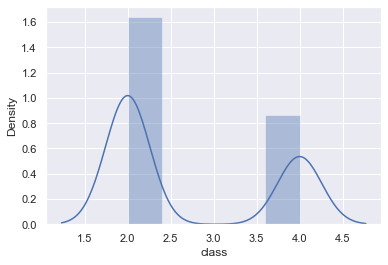

In [254]:
sns.distplot(cancer_dataset['class'])

#### Multivariate Data analysis

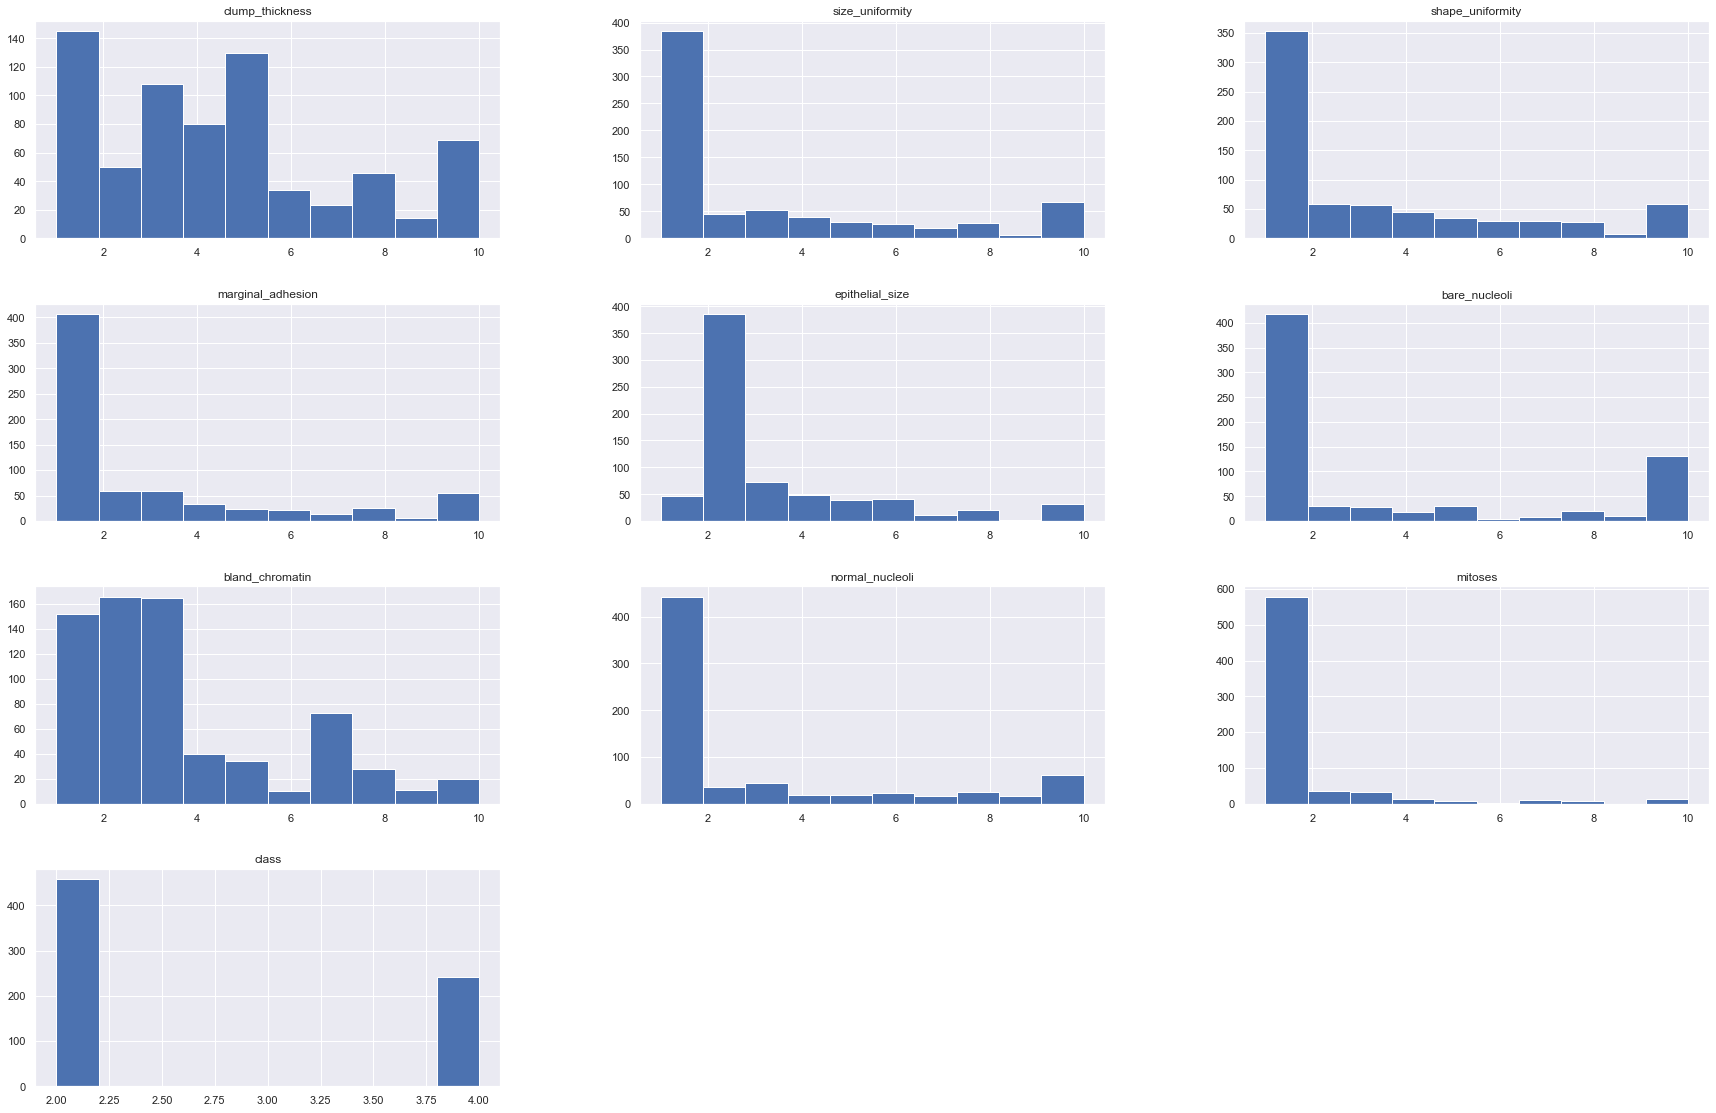

In [255]:
# adding a semicolon removes the lot of written stuffs on the top of the graph
cancer_dataset.hist(figsize=(30,30), layout=(6,3));

<AxesSubplot:>

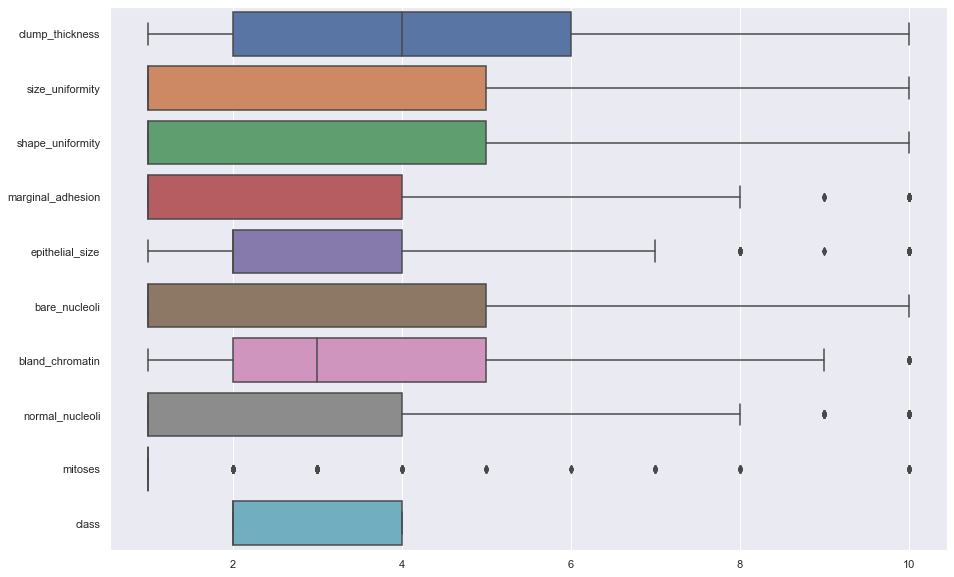

In [256]:
plt.figure(figsize=(15,10))
sns.boxplot(data=cancer_dataset, orient='h')

The boxplots suggest that only 5 of the columns (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses) contain abnormally high values. To discard the outliers, we can compute the Z-score for each attribute and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3).

In [258]:
# check the correlation of the features
cancer_dataset.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


If there is high correlation between the variables, then it can dealth using PCA to avoid multicollinearity
here we notice that the class and shape uniformity is really high

Text(0.5, 1.0, 'Correlation between different attributes')

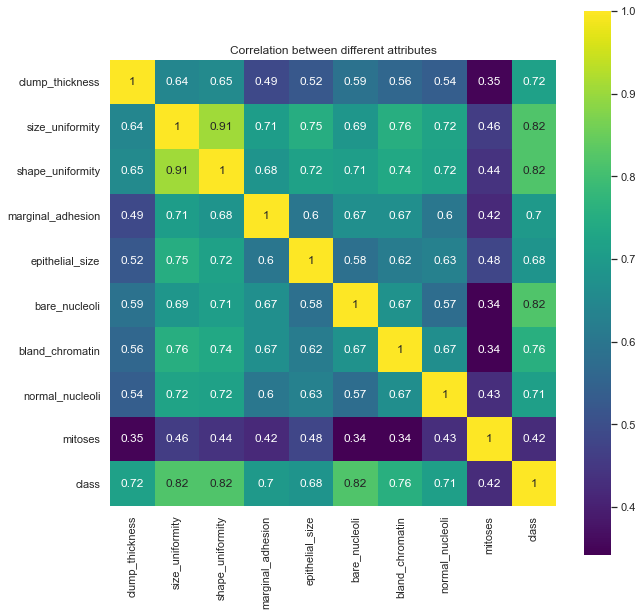

In [265]:
plt.figure(figsize=(10,10))
sns.heatmap(cancer_dataset.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')

The brighter the colour more the correlation of the attributes.Size and shape uniformaity have high correlation. Similarly, size, shape and bare nucleoli have high correlation with class.

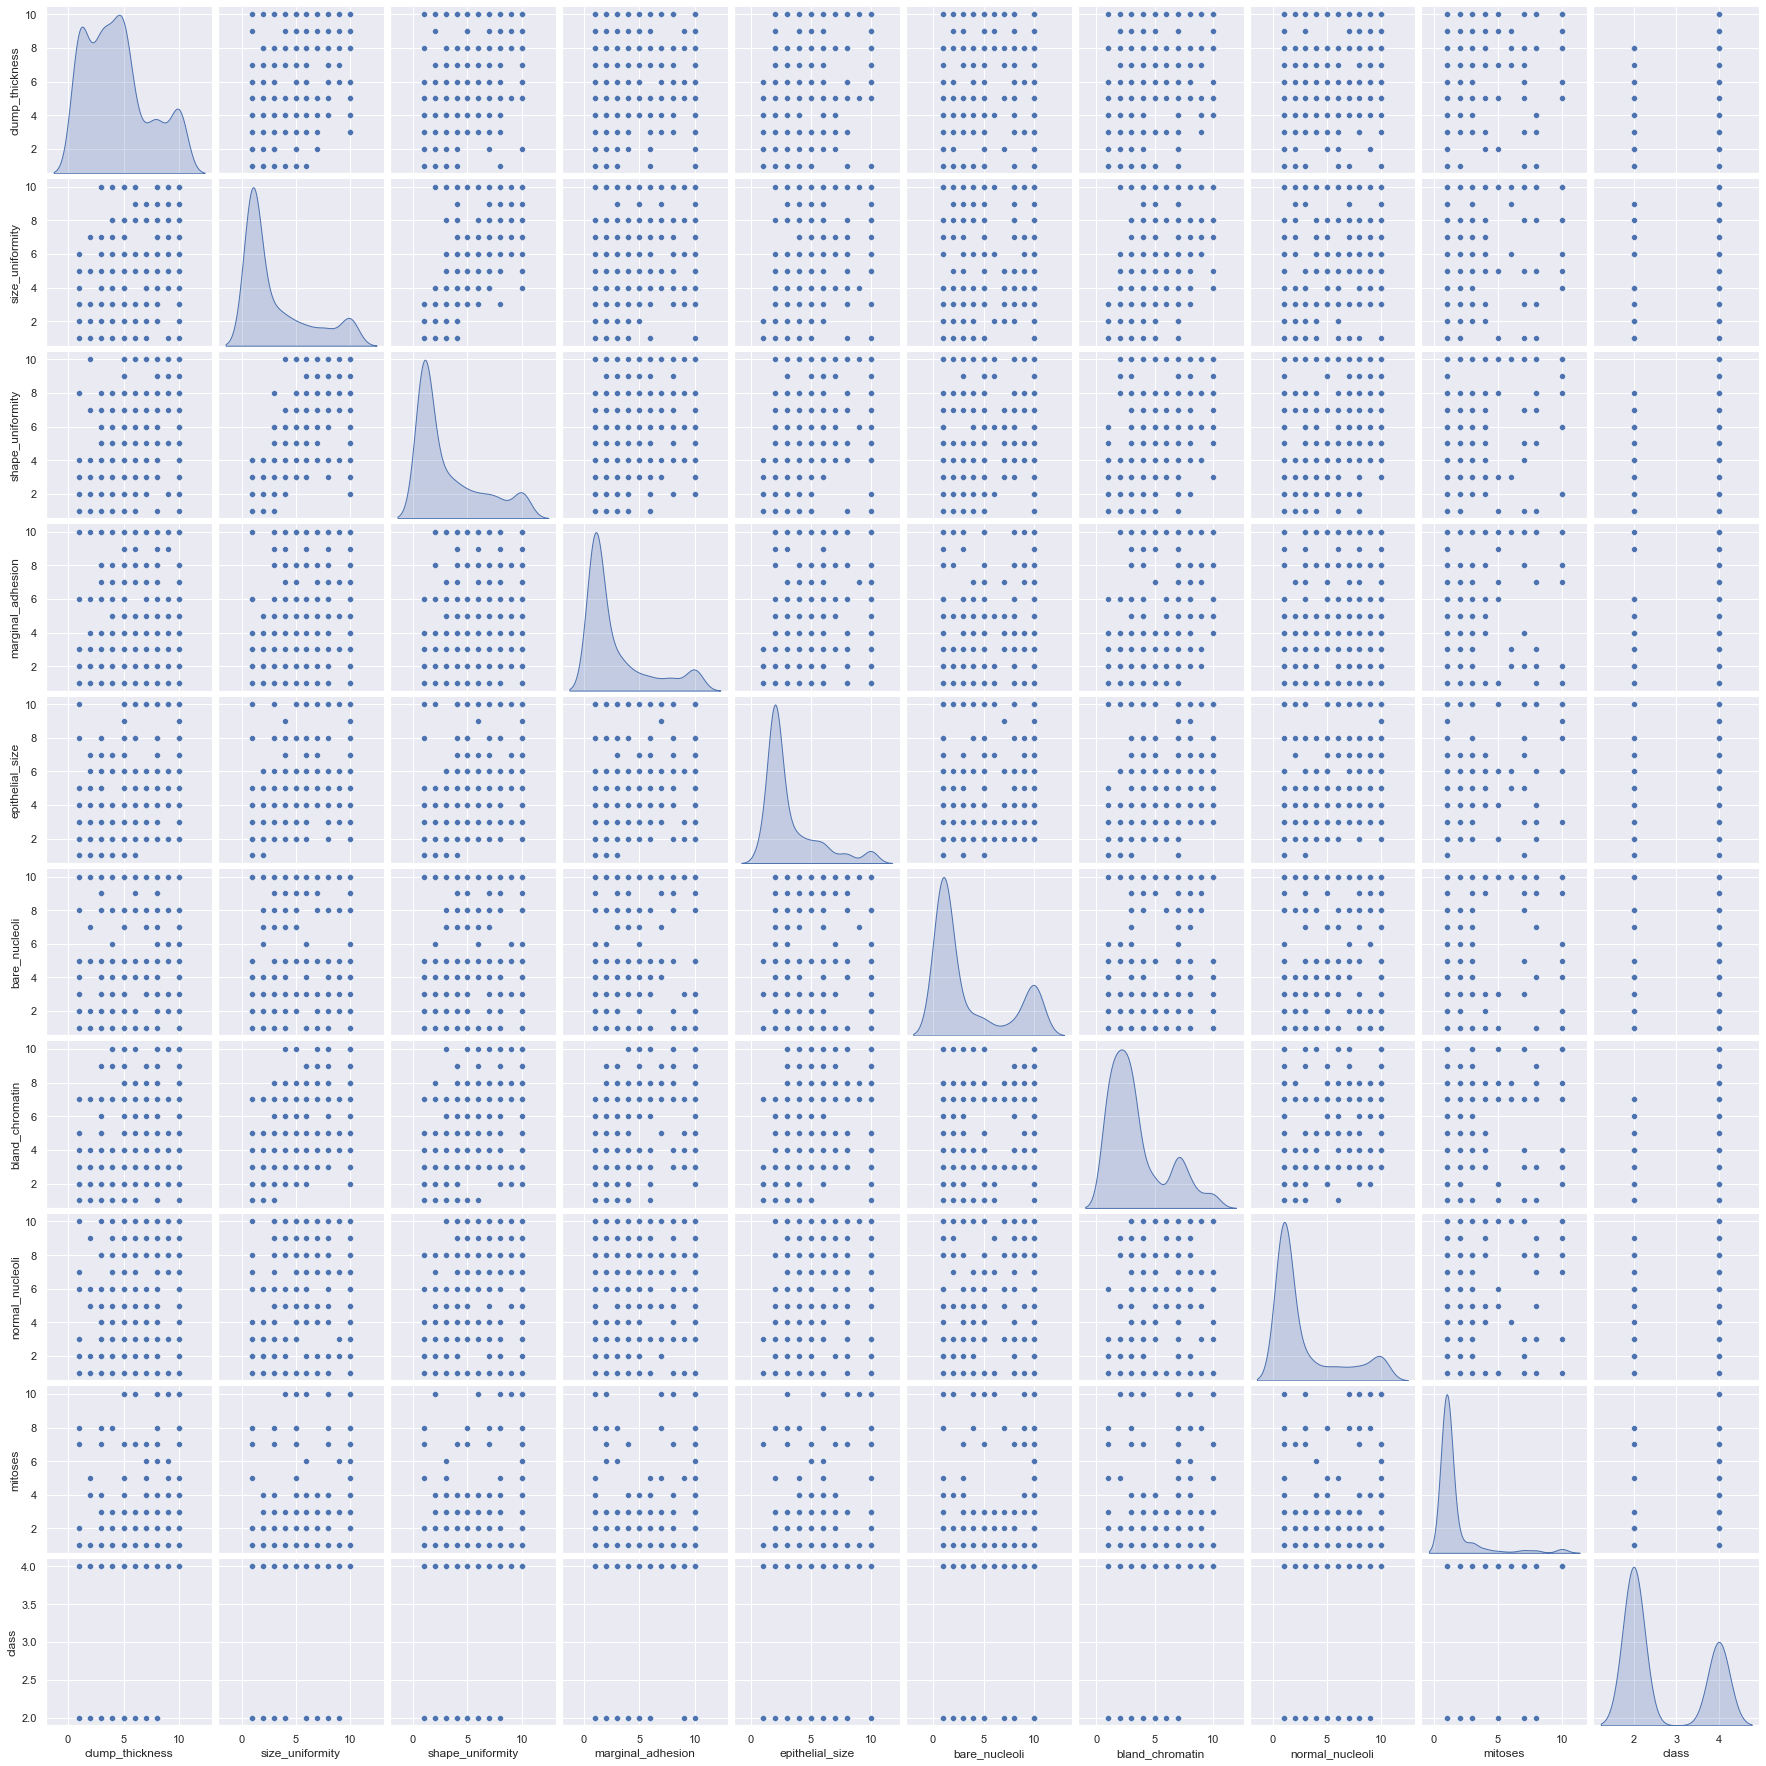

In [266]:
sns.pairplot(cancer_dataset, diag_kind='kde')

The features are not linearly related. Therefore, we will have to build machine learning models which can deal with non-linear data.

### Build model

In [329]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [269]:
X=cancer_dataset.drop('class',axis=1)
y=cancer_dataset['class']

In [270]:
# split the data into train and test set, 70:30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [282]:
print(f'Number of training dataset: {X_train.shape[0]}')
print(f'Number of test dataset: {X_test.shape[0]}')

Number of training dataset: 489
Number of test dataset: 210


#### Support vector machine

In [335]:
model_svm = make_pipeline(StandardScaler(),SVC(gamma='auto',C=3))

In [336]:
model_svm.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=3, gamma='auto'))])

In [340]:
svc_y_pred = model_svm.predict(X_test)

In [341]:
print(classification_report(svc_y_pred,y_test))

              precision    recall  f1-score   support

           2       0.98      0.97      0.97       145
           4       0.93      0.95      0.94        65

    accuracy                           0.96       210
   macro avg       0.95      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



In [342]:
print(f'The accuracy of SVC is {round((accuracy_score(y_test, svc_y_pred)*100),2)}')

The accuracy of SVC is 96.19


<AxesSubplot:>

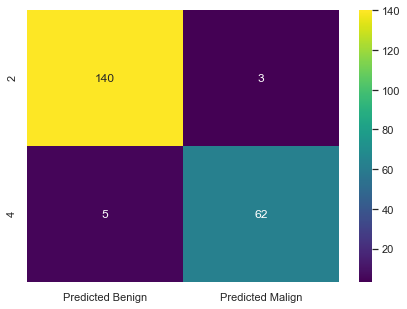

In [361]:
cm = confusion_matrix(y_test,svc_y_pred,labels=[2,4])
df_cm = pd.DataFrame(cm,index=[i for i in [2,4]],columns=[i for i in ['Predicted Benign','Predicted Malign']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,cmap='viridis',fmt='g')

#### Hyperparameter training of SVM

In [334]:
parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

svm = SVC()
svm_cv = GridSearchCV(svm, parameters, refit=True,cv=10)
svm_cv.fit(X_train, y_train)

#print('Best hyperparameter setting: {0}.'.format(svm_cv.best_estimator_))
print('Best parameters setting: {0}.'.format(svm_cv.best_params_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(svm_cv.best_score_))
print('Test dataset accuracy of best hyperparameter setting: {0}.'.format(svm_cv.score(X_test, y_test)))

Best hyperparameter setting: SVC(C=1, gamma=0.01).
Best parameters setting: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}.
Average accuracy across folds of best hyperparameter setting: 0.9733843537414966.
Test dataset accuracy of best hyperparameter setting: 0.9714285714285714.


#### K-nearest neighbour

In [343]:
model_knn = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=9, weights='distance'))

In [344]:
model_knn.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=9, weights='distance'))])

In [345]:
knn_y_pred = model_knn.predict(X_test)

In [346]:
print(classification_report(knn_y_pred,y_test))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98       144
           4       0.96      0.97      0.96        66

    accuracy                           0.98       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.98      0.98      0.98       210



In [347]:
print(f'The accuracy of KNN is {round((accuracy_score(y_test, knn_y_pred)*100),2)}')

The accuracy of KNN is 97.62


<AxesSubplot:>

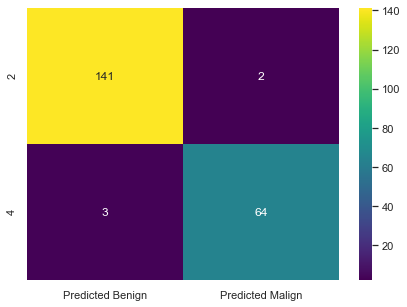

In [362]:
cm = confusion_matrix(y_test,knn_y_pred,labels=[2,4])
df_cm = pd.DataFrame(cm,index=[i for i in [2,4]],columns=[i for i in ['Predicted Benign','Predicted Malign']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,cmap='viridis',fmt='g')

#### Find the best hyper parameter for KNN

In [317]:
parameters = {'n_neighbors': list(np.linspace(start=2,stop=10,num=10,dtype=int))}
print(f'The parameters are {parameters}')
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(knn_cv.best_estimator_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(knn_cv.best_score_))
print('Test dataset accuracy of best hyperparameter setting: {0}.'.format(knn_cv.score(X_test, y_test)))

The parameters are {'n_neighbors': [2, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
Best hyperparameter setting: KNeighborsClassifier(n_neighbors=9).
Average accuracy across folds of best hyperparameter setting: 0.9672619047619048.
Test dataset accuracy of best hyperparameter setting: 0.9714285714285714.
